In [2]:
frames = 250000000

frames / (3600 * 24)

2893.5185185185187

## Policy Iteration

In [173]:
import matplotlib.pyplot as plt
import numpy as np
import json
from space import Space

index = 3
with open(f'policies/value_function_{index}.json') as json_file:
  value_function = json.load(json_file)
with open(f'policies/policy_{index}.json') as json_file:
  policy = json.load(json_file)

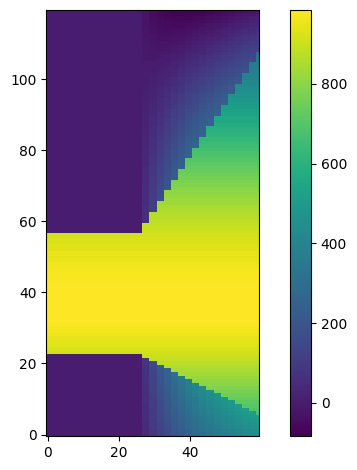

In [175]:
# height = 25
height = 9

values = np.zeros((120, 60))
for i in range(120):
  for j in range(60):
    state = f"({i}, {height}, {j})"
    values[i, j] = value_function[state]

fig, ax = plt.subplots()
im = ax.imshow(values, origin='lower')

fig.colorbar(im)

fig.tight_layout()
plt.savefig("heatmap2.png")

plt.show()



In [99]:
state = (97, 9, 50)
next_state = (98, 9, 48)

print(policy[str(state)], value_function[str(state)])
print(policy[str(next_state)], value_function[str(next_state)])

player_height = state[0] * 8
pipe1_height = (state[1] * 4) + 150
pipe2_height = pipe1_height + 300
pipe_distance = state[2] * 8

print(player_height, pipe1_height, pipe2_height, 40 - (0.5 * (pipe1_height + 10 - player_height)), 40 - (0.5 * (player_height + 80 - pipe2_height)))

1 103.54929132416768
1 75.71824940481733
776 186 486 330.0 -145.0


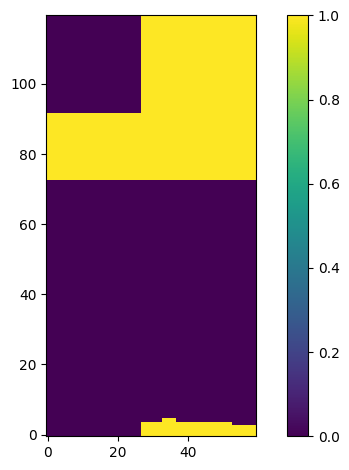

In [223]:
height = '80'
actions = ('0', '1')
values = np.zeros((120, 60))

for state in value_function:
    
    state_player_height, state_pipe_height, state_distance = state.split(',')
    if state_pipe_height.strip() != height:
        continue
    
    i = int(state_player_height.strip()[1:])
    j = int(state_distance.strip()[:-1])
    values[i, j] = policy[state]

fig, ax = plt.subplots()
im = ax.imshow(values, origin="lower")

fig.colorbar(im)

fig.tight_layout()
plt.show()

## SARSA

In [229]:
import matplotlib.pyplot as plt
import numpy as np
import json
import sys
from space import Space

def get_value_function_values(height: str, value_function):
    actions = ('0', '1')
    values = np.zeros((120, 60))
    
    for state in value_function:
        
        state_player_height, state_pipe_height, state_distance = state.split(',')
        if state_pipe_height.strip() != height:
            continue
        
        max_value = -sys.maxsize
        for action in actions:
            max_value = max(max_value, value_function[state][action])
        
        i = int(state_player_height.strip()[1:])
        j = int(state_distance.strip()[:-1])
        values[i, j] = max_value

    return values

def get_policy_values(height: str, value_function):
    actions = ('0', '1')
    values = np.zeros((120, 60))
    
    for state in value_function:
        
        state_player_height, state_pipe_height, state_distance = state.split(',')
        if state_pipe_height.strip() != height:
            continue
        
        i = int(state_player_height.strip()[1:])
        j = int(state_distance.strip()[:-1])
        if value_function[state]['0'] > value_function[state]['1']:
            values[i, j] = 1
        else:
            values[i, j] = 0

    return values

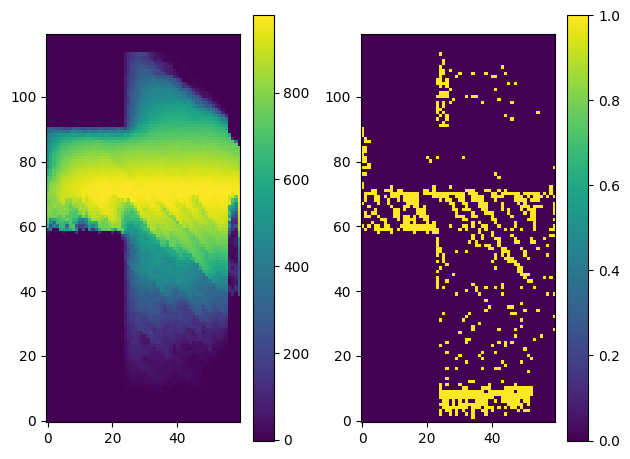

In [239]:
index = 887
with open(f"action_value_functions/action_value_function_{index}.json") as json_file:
  value_function = json.load(json_file)

height = '80'

value_function_values = get_value_function_values(height, value_function)
policy_values = get_policy_values(height, value_function)

fig = plt.figure()

ax1 = fig.add_subplot(121)
im1 = ax1.imshow(value_function_values, origin="lower")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(policy_values, origin="lower")
fig.colorbar(im2)

fig.tight_layout()
plt.show()

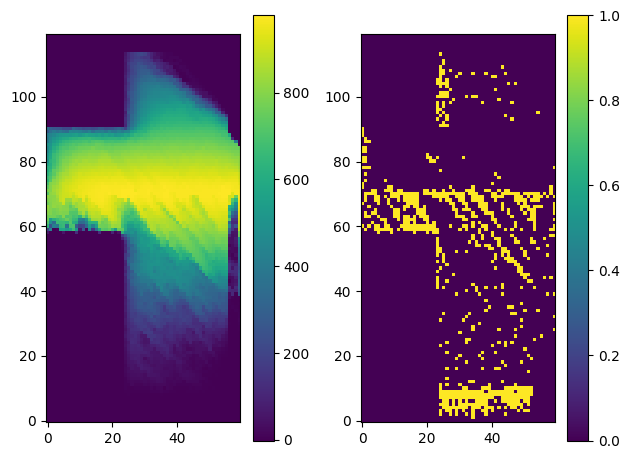

In [238]:
index = 886
with open(f"action_value_functions/action_value_function_{index}.json") as json_file:
  value_function = json.load(json_file)

height = '80'

value_function_values = get_value_function_values(height, value_function)
policy_values = get_policy_values(height, value_function)

fig = plt.figure()

ax1 = fig.add_subplot(121)
im1 = ax1.imshow(value_function_values, origin="lower")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(policy_values, origin="lower")
fig.colorbar(im2)

fig.tight_layout()
plt.show()

In [146]:
baseline_value_function = {}

height_range = 90
player_height_range = 120
player_distance_range = 60

for height in range(height_range):

    baseline_value = 0
    for player_height in range(player_height_range):
        for player_distance in range(player_distance_range):
            
            state = f"({player_height}, {height}, {player_distance})"
            if state == "(0, 0, 0)":
                continue
            
            baseline_value += value_function[state]['0']
            baseline_value += value_function[state]['1']

    baseline_value /= (player_height_range * player_distance_range * 2)

    for player_height in range(player_height_range):
        for player_distance in range(player_distance_range):
            
            state = f"({player_height}, {height}, {player_distance})"
            baseline_value_function[state] = {'0': baseline_value, '1': baseline_value}

with open(f"action_value_functions/baseline_value_function.json", "w") as file:
        json.dump(baseline_value_function, file)